# SETI Signal Simulator

### Generated pseudo-signal spectrograms for deep learning

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as s
import random

In [ ]:
#paths

path = ''


#### Function for mapping 1D data into 2D for the consequent pseudo-spectrogram

In [2]:
def one_d_to_two_d(one_d_data, n_points=500, lower=0, upper=500, sig_strength=1, offset=0, flip=False, gradient=1, chop=False, gap_size=25, signal_length=50):
    dt_scaled = np.interp(one_d_data, (one_d_data.min(), one_d_data.max()), (lower, upper))
    xvals = np.linspace(0, n_points, upper*10) #create the new x-axis. The last parameter is the number of new points
    xvals = xvals * gradient
    f = np.arange(0,n_points,1)
    yinterp = np.interp(xvals, f, dt_scaled)
    dt_scaled = yinterp
    
    n = n_points / (gap_size + signal_length)
    i=0
    
    if chop == True:
        while i<n:
            dt_scaled[(i*gap_size+i*signal_length):((i+1)*gap_size+i*signal_length)] = 0
            i=i+1
    
    for n in range(0, len(dt_scaled), 1):
        dt_scaled[n] = (round(dt_scaled[n],9))
    dt_scaled = dt_scaled.astype(int)
    two_d = np.random.normal(0, 13, (max(dt_scaled), max(dt_scaled)))
    
    if chop == False:
        for i in range(0, max(dt_scaled)-1, 1):
            try:
                two_d[dt_scaled[i]+offset,i] = sig_strength
                two_d[dt_scaled[i]+offset,i+1] = sig_strength
                two_d[dt_scaled[i]+offset,i-1] = sig_strength
                two_d[dt_scaled[i]+offset+1,i] = sig_strength
                two_d[dt_scaled[i]+offset-1,i] = sig_strength
            except:
                IndexError
            continue
                
    if chop == True:
        for i in range(0, max(dt_scaled)-1, 1):
            try:
                if dt_scaled[i] == 0:
                    two_d[dt_scaled[i]+offset,i] = np.random.normal(0,13,1)
                else:
                    two_d[dt_scaled[i]+offset,i] = sig_strength
                    two_d[dt_scaled[i]+offset,i+1] = sig_strength
                    two_d[dt_scaled[i]+offset,i-1] = sig_strength
                    two_d[dt_scaled[i]+offset+1,i] = sig_strength
                    two_d[dt_scaled[i]+offset-1,i] = sig_strength

            #two_d[dt_scaled[i]+1,i+1] = sig_strength
            #two_d[dt_scaled[i]+1,i-1] = sig_strength
            #two_d[dt_scaled[i]-1,i+1] = sig_strength
            #two_d[dt_scaled[i]-1,i-1] = sig_strength

            #two_d[dt_scaled[i]+2,i+1] = sig_strength
            #two_d[dt_scaled[i]+2,i-1] = sig_strength
            #two_d[dt_scaled[i]-2,i+1] = sig_strength
            #two_d[dt_scaled[i]-2,i-1] = sig_strength

            #two_d[dt_scaled[i]+1,i+2] = sig_strength
            #two_d[dt_scaled[i]+1,i-2] = sig_strength
            #two_d[dt_scaled[i]-1,i+2] = sig_strength
            #two_d[dt_scaled[i]-1,i-2] = sig_strength

            #two_d[dt_scaled[i]+2,i+2] = sig_strength
            #two_d[dt_scaled[i]+2,i-2] = sig_strength
            #two_d[dt_scaled[i]-2,i+2] = sig_strength
            #two_d[dt_scaled[i]-2,i-2] = sig_strength

            #two_d[dt_scaled[i]+3,i+2] = sig_strength
            #two_d[dt_scaled[i]+3,i-1] = sig_strength
            #two_d[dt_scaled[i]-3,i+2] = sig_strength
            #two_d[dt_scaled[i]-3,i-2] = sig_strength

            #two_d[dt_scaled[i],i+2] = sig_strength
            #two_d[dt_scaled[i],i-2] = sig_strength
            #two_d[dt_scaled[i]+2,i] = sig_strength
            #two_d[dt_scaled[i]-2,i] = sig_strength
            except:
                IndexError
            continue

    if flip == True:
        two_d = np.fliplr(two_d)
            
    return(two_d.transpose())

#### Noise

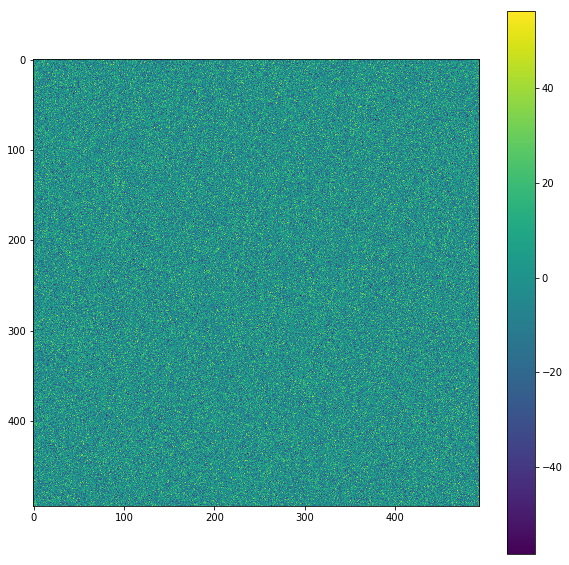

In [220]:
# parameters
# ==========
# none

empty = np.random.normal(0,1,500)
noise = one_d_to_two_d(one_d_data=empty)

fig = plt.figure(figsize=(10, 10))
plt.imshow(noise, interpolation='none')
plt.colorbar()
plt.show()

#### Narrowband

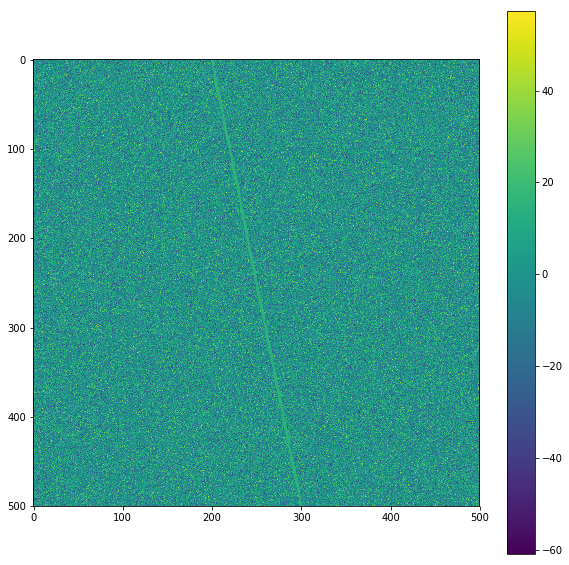

In [9]:
# parameters
# ==========
# signal strength: 10-30
# offset: 0-400
# gradient: 1-3
# flip: true/false

N_points = 500
narrowband_1d = np.linspace(0, N_points, 500)

narrowband_2d = one_d_to_two_d(one_d_data=narrowband_1d, sig_strength=15, offset=200, gradient=2)

fig = plt.figure(figsize=(10, 10))
plt.imshow(narrowband_2d, interpolation='none')
plt.colorbar()
plt.show()

#### Squiggle

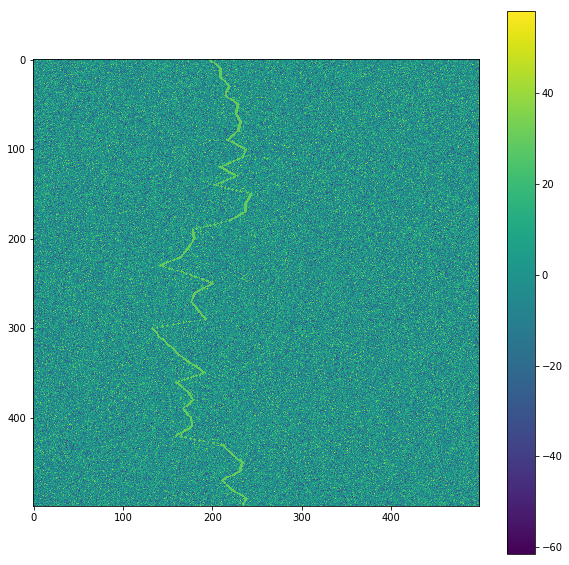

In [222]:
# parameters
# ==========
# mu: 0.01 - 1
# sigma: 0.01 - 1
# signal strength: 10-30
# offset: 0-400

# Squiggle 1d definition based upon Brownian motion

def geometric_brownian_motion(T = 0.01, N = 100000, mu = 1, sigma = 0.1, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

N_points = 500
random_walk = geometric_brownian_motion(T = 1, N = N_points, mu = 0.1, sigma = 0.5, S0 = 10)

squiggle = one_d_to_two_d(one_d_data=random_walk, sig_strength=30)

fig = plt.figure(figsize=(10, 10))
plt.imshow(squiggle, interpolation='none')
plt.colorbar()
plt.show()

#### SquarePulsedNarrowBand

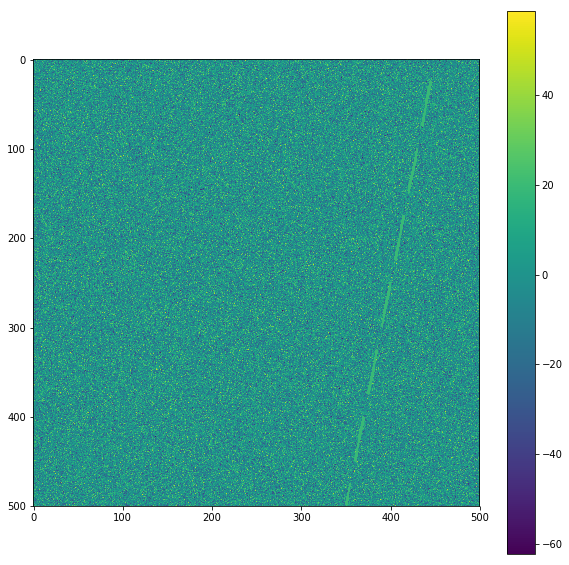

In [217]:
# parameters
# ==========
# signal strength: 10-30
# offset: 0-400
# gradient: 1-3
# Flip: True/False
# gap_size = 25-100 (int)
# signal_length = 25-100 (int)

N_points = 500
sp_narrowband_1d = np.linspace(0, N_points, 500)
gap_size = 50
signal_length = 50

sp_narrowband_2d = one_d_to_two_d(one_d_data=sp_narrowband_1d, sig_strength=20, gradient=2, offset=50, flip = True, chop=True)

fig = plt.figure(figsize=(10, 10))
plt.imshow(sp_narrowband_2d, interpolation='none')
plt.colorbar()
plt.show()

In [90]:
#np.savetxt("narrowband_2d.csv", narrowband_2d, delimiter=",")

#### Narrowband DRD

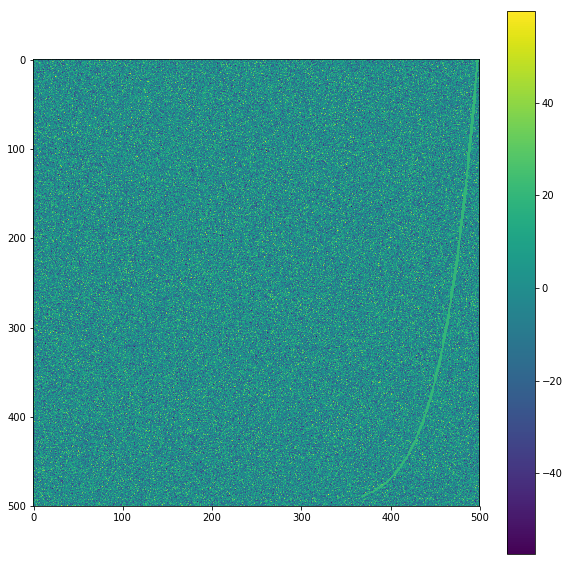

In [78]:
# parameters
# ==========
# power: 0.1-0.9
# signal strength: 10-30
# offset: 0-400
# gradient: 1-3
# Flip: True/False

N_points = 500
power_choice = 0.1
narrowbandDRD_1d = np.linspace(0, N_points, 500)
narrowbandDRD_1d = np.power(narrowbandDRD_1d,power_choice)

narrowbandDRD_2d = one_d_to_two_d(one_d_data=narrowbandDRD_1d, sig_strength=20, offset=100, flip=True)

fig = plt.figure(figsize=(10, 10))
plt.imshow(narrowbandDRD_2d, interpolation='none')
plt.colorbar()
plt.show()

#### SquiggleSquarePulsedNarrowBand

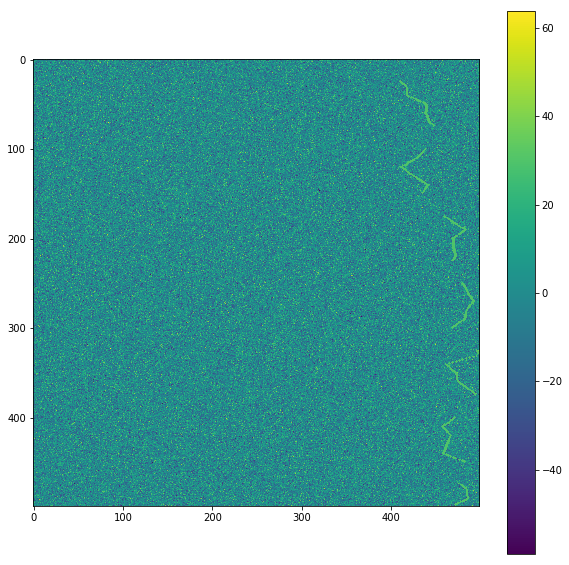

In [248]:
# parameters
# ==========
# mu: 0.01 - 1
# sigma: 0.01 - 1
# signal strength: 10-30
# offset: 0-400

# Squiggle 1d definition based upon Brownian motion

N_points = 500
random_walk = geometric_brownian_motion(T = 1, N = N_points, mu = 0.2, sigma = 0.5, S0 = 1)
squigglesquare_1d = random_walk

squigglesquare_2d = one_d_to_two_d(one_d_data=squigglesquare_1d, sig_strength=30, chop=True)

fig = plt.figure(figsize=(10, 10))
plt.imshow(squigglesquare_2d, interpolation='none')
plt.colorbar()
plt.show()

#### Bright pixel

[283]
[67]


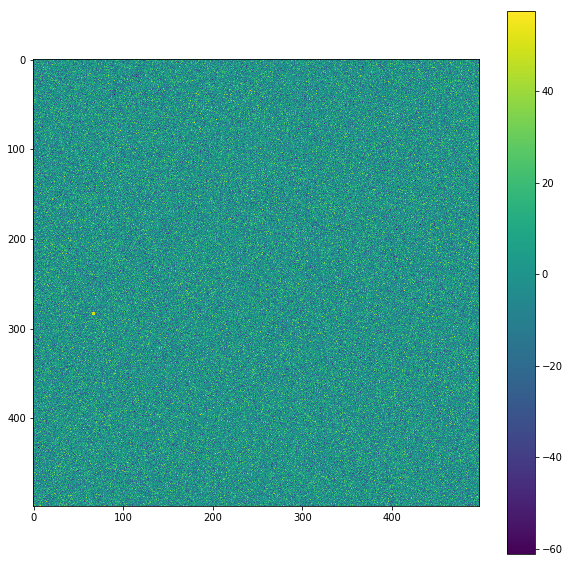

In [5]:
# parameters
# ==========
# signal_strength: 40-60

N_points = 500
empty = np.random.normal(0,1,500)
brightpixel_2d = one_d_to_two_d(one_d_data=empty, sig_strength=0.5)

index1 = np.random.choice(brightpixel_2d.shape[0], 1, replace=False)
index2 = np.random.choice(brightpixel_2d.shape[1], 1, replace=False) 

print(index1)
print(index2)

sig_strength_pixel = 50

brightpixel_2d[index1,index2] = sig_strength_pixel

brightpixel_2d[index1,index2+1] = sig_strength_pixel
brightpixel_2d[index1,index2-1] = sig_strength_pixel
brightpixel_2d[index1+1,index2] = sig_strength_pixel
brightpixel_2d[index1-1,index2] = sig_strength_pixel

brightpixel_2d[index1+1,index2+1] = sig_strength_pixel
brightpixel_2d[index1+1,index2-1] = sig_strength_pixel
brightpixel_2d[index1-1,index2+1] = sig_strength_pixel
brightpixel_2d[index1-1,index2-1] = sig_strength_pixel

#brightpixel_2d[index1+2,index2+1] = sig_strength_pixel
#brightpixel_2d[index1+2,index2-1] = sig_strength_pixel
#brightpixel_2d[index1-2,index2+1] = sig_strength_pixel
#brightpixel_2d[index1-2,index2-1] = sig_strength_pixel

#brightpixel_2d[index1+1,index2+2] = sig_strength_pixel
#brightpixel_2d[index1+1,index2-2] = sig_strength_pixel
#brightpixel_2d[index1-1,index2+2] = sig_strength_pixel
#brightpixel_2d[index1-1,index2-2] = sig_strength_pixel

#brightpixel_2d[index1+2,index2+2] = sig_strength_pixel
#brightpixel_2d[index1+2,index2-2] = sig_strength_pixel
#brightpixel_2d[index1-2,index2+2] = sig_strength_pixel
#brightpixel_2d[index1-2,index2-2] = sig_strength_pixel

#brightpixel_2d[index1+3,index2+2] = sig_strength_pixel
#brightpixel_2d[index1+3,index2-1] = sig_strength_pixel
#brightpixel_2d[index1-3,index2+2] = sig_strength_pixel
#brightpixel_2d[index1-3,index2-2] = sig_strength_pixel

#brightpixel_2d[index1,index2+2] = sig_strength_pixel
#brightpixel_2d[index1,index2-2] = sig_strength_pixel
#brightpixel_2d[index1+2,index2] = sig_strength_pixel
#brightpixel_2d[index1-2,index2] = sig_strength_pixel

fig = plt.figure(figsize=(10, 10))
plt.imshow(brightpixel_2d, interpolation='none')
plt.colorbar()
plt.show()

### Training Data Generator

In [12]:
number_of_images = 1000 #number per class

#### Noise

In [13]:
# parameters
# ==========
# none

save_path = 'd:/repos_personal/other/SETI/my_generated_images/'
i = 0

while i<=number_of_images:
    empty = np.random.normal(0,1,500)
    noise = one_d_to_two_d(one_d_data=empty)
    plt.imshow(noise, interpolation='none')
    plt.axis('off')
    plt.savefig(save_path + 'noise_' + str(i) + '.png', bbox_inches='tight')
    plt.close()
    i=i+1

#### Narrowband

In [14]:
# parameters
# ==========
# signal strength: 10-30 (float)
# offset: 0-400 (int)
# gradient: 1-3 (float)
# flip: true/false (boolean)

save_path = 'd:/repos_personal/other/SETI/my_generated_images/'
i = 0

while i<=number_of_images:
    sig_strength = (20 * np.random.random()) + 10
    offset = np.random.randint(200, size=1)
    gradient = (3 * np.random.random()) + 1
    flip = bool(random.getrandbits(1))
    N_points = 500
    narrowband_1d = np.linspace(0, N_points, 500)
    narrowband_2d = one_d_to_two_d(one_d_data=narrowband_1d, sig_strength=sig_strength, offset=offset, gradient=gradient, flip=flip)
    plt.imshow(narrowband_2d, interpolation='none')
    plt.axis('off')
    plt.savefig(save_path + 'narrowband_' + str(i) + '.png', bbox_inches='tight')
    plt.close()
    i=i+1

#### Squiggle

In [15]:
# parameters
# ==========
# mu: 0.01 - 1 (float)
# sigma: 0.01 - 1 (float)
# signal strength: 10-30 (float)
# offset: 0-300 (int)

# Squiggle 1d definition based upon Brownian motion

def geometric_brownian_motion(T = 0.01, N = 100000, mu = 1, sigma = 0.1, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

save_path = 'd:/repos_personal/other/SETI/my_generated_images/'
i = 0

while i<=number_of_images:
    sig_strength = (20 * np.random.random()) + 10
    offset = np.random.randint(200, size=1)
    mu = np.random.random() + 0.01
    sigma = np.random.random() + 0.01

    N_points = 500
    random_walk = geometric_brownian_motion(T = 1, N = N_points, mu = mu, sigma = sigma, S0 = 1)
    squiggle = one_d_to_two_d(one_d_data=random_walk, sig_strength=30)

    plt.imshow(squiggle, interpolation='none')
    plt.axis('off')
    plt.savefig(save_path + 'squiggle_' + str(i) + '.png', bbox_inches='tight')
    plt.close()
    i=i+1

#### SquarePulsedNarrowBand

In [16]:
# parameters
# ==========
# signal strength: 10-30 (float)
# offset: 0-400 (int)
# gradient: 1-3 (float)
# Flip: True/False (boolean)
# gap_size = 25-100 (int)
# signal_length = 25-100 (int)

save_path = 'd:/repos_personal/other/SETI/my_generated_images/'
i = 0

while i<=number_of_images:
    sig_strength = (20 * np.random.random()) + 10
    offset = np.random.randint(200, size=1)
    gradient = (3 * np.random.random()) + 1
    flip = bool(random.getrandbits(1))
    gap_size = np.random.randint(75) + 25
    signal_length = np.random.randint(75) + 25
    
    N_points = 500
    sp_narrowband_1d = np.linspace(0, N_points, 500)
    sp_narrowband_2d = one_d_to_two_d(one_d_data=sp_narrowband_1d, sig_strength=sig_strength, gradient=gradient, chop=True, offset=offset, gap_size=gap_size, signal_length=signal_length, flip=flip)
    plt.imshow(sp_narrowband_2d, interpolation='none')
    plt.axis('off')
    plt.savefig(save_path + 'squarepulsednarrowband_' + str(i) + '.png', bbox_inches='tight')
    plt.close()
    i=i+1

#### Narrowband DRD

In [17]:
# parameters
# ==========
# power: 0.1-0.8 (float)
# signal strength: 10-30 (float)
# offset: 0-100 (int)
# gradient: 1-3 (float)
# Flip: True/False (boolean)

save_path = 'd:/repos_personal/other/SETI/my_generated_images/'
i = 0

while i<=number_of_images:
    sig_strength = (20 * np.random.random()) + 10
    gradient = (3 * np.random.random()) + 1
    flip = bool(random.getrandbits(1))
    power_choice = (0.7 * np.random.random()) + 0.1
    
    N_points = 500
    narrowbandDRD_1d = np.linspace(0, N_points, 500)
    narrowbandDRD_1d = np.power(narrowbandDRD_1d,power_choice)
    narrowbandDRD_2d = one_d_to_two_d(one_d_data=narrowbandDRD_1d, gradient=gradient, sig_strength=sig_strength, offset=offset, flip=flip)

    plt.imshow(narrowbandDRD_2d, interpolation='none')
    plt.axis('off')
    plt.savefig(save_path + 'narrowbanddrd_' + str(i) + '.png', bbox_inches='tight')
    plt.close()
    i=i+1

#### SquiggleSquarePulsedNarrowBand

In [18]:
# parameters
# ==========
# mu: 0.01 - 1
# sigma: 0.01 - 1
# signal strength: 10-30
# offset: 0-200

def geometric_brownian_motion(T = 0.01, N = 100000, mu = 1, sigma = 0.1, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

save_path = 'd:/repos_personal/other/SETI/my_generated_images/'
i = 0

while i<=number_of_images:
    sig_strength = (20 * np.random.random()) + 10
    offset = np.random.randint(200, size=1)
    mu = np.random.random() + 0.01
    sigma = np.random.random() + 0.01

    N_points = 500
    random_walk = geometric_brownian_motion(T = 1, N = N_points, mu = mu, sigma = sigma, S0 = 1)
    squigglesquare_1d = random_walk
    squigglesquare_2d = one_d_to_two_d(one_d_data=squigglesquare_1d, sig_strength=sig_strength, offset=offset, chop=True)
    
    plt.imshow(squigglesquare_2d, interpolation='none')
    plt.axis('off')
    plt.savefig(save_path + 'squigglesquarepulsednarrowband_2d_' + str(i) + '.png', bbox_inches='tight')
    plt.close()
    i=i+1

#### Bright pixel

In [22]:
# parameters
# ==========
# signal_strength: 40-60

save_path = 'd:/repos_personal/other/SETI/my_generated_images/'
i = 0

while i<=number_of_images:
    
    empty = np.random.normal(0,1, N_points)
    brightpixel_2d = one_d_to_two_d(one_d_data=empty, sig_strength=0)

    index1 = np.random.choice(brightpixel_2d.shape[0], 1, replace=True)
    index2 = np.random.choice(brightpixel_2d.shape[1], 1, replace=True) 

    sig_strength_pixel = 50

    try:
    
        brightpixel_2d[index1,index2] = sig_strength_pixel

        brightpixel_2d[index1,index2+1] = sig_strength_pixel
        brightpixel_2d[index1,index2-1] = sig_strength_pixel
        brightpixel_2d[index1+1,index2] = sig_strength_pixel
        brightpixel_2d[index1-1,index2] = sig_strength_pixel

        brightpixel_2d[index1+1,index2+1] = sig_strength_pixel
        brightpixel_2d[index1+1,index2-1] = sig_strength_pixel
        brightpixel_2d[index1-1,index2+1] = sig_strength_pixel
        brightpixel_2d[index1-1,index2-1] = sig_strength_pixel

        brightpixel_2d[index1+2,index2+1] = sig_strength_pixel
        brightpixel_2d[index1+2,index2-1] = sig_strength_pixel
        brightpixel_2d[index1-2,index2+1] = sig_strength_pixel
        brightpixel_2d[index1-2,index2-1] = sig_strength_pixel

        brightpixel_2d[index1+1,index2+2] = sig_strength_pixel
        brightpixel_2d[index1+1,index2-2] = sig_strength_pixel
        brightpixel_2d[index1-1,index2+2] = sig_strength_pixel
        brightpixel_2d[index1-1,index2-2] = sig_strength_pixel

        brightpixel_2d[index1+2,index2+2] = sig_strength_pixel
        brightpixel_2d[index1+2,index2-2] = sig_strength_pixel
        brightpixel_2d[index1-2,index2+2] = sig_strength_pixel
        brightpixel_2d[index1-2,index2-2] = sig_strength_pixel

        brightpixel_2d[index1+3,index2+2] = sig_strength_pixel
        brightpixel_2d[index1+3,index2-1] = sig_strength_pixel
        brightpixel_2d[index1-3,index2+2] = sig_strength_pixel
        brightpixel_2d[index1-3,index2-2] = sig_strength_pixel

        brightpixel_2d[index1,index2+2] = sig_strength_pixel
        brightpixel_2d[index1,index2-2] = sig_strength_pixel
        brightpixel_2d[index1+2,index2] = sig_strength_pixel
        brightpixel_2d[index1-2,index2] = sig_strength_pixel
        
        #fig = plt.figure(figsize=(10, 10))
        plt.imshow(brightpixel_2d, interpolation='none')
        plt.axis('off')
        plt.savefig(save_path + 'brightpixel_2d_' + str(index1) + '_' + str(index2) + '_' + str(i) + '.png', bbox_inches='tight')
        plt.close()
        i=i+1
        
    except:
        IndexError
    continue